<a href="https://colab.research.google.com/github/ashrafya/TWT-ML-applications/blob/master/linear_regression_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files 
uploaded = files.upload()

Saving student-mat.csv to student-mat.csv


In [0]:
#import appropriate packages
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.utils import shuffle
import math
import pickle

In [30]:
#read  data from the file
data = pd.read_csv('student-mat.csv', sep=';')
data.head()  # to check if data is uploading


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [0]:
#trim our data, by only taking in the columns that we need
#lol lets check if having a relationship affects teh students marks in this case
data = data[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']]

In [32]:
#set data that we will be predicting
predicting = 'G3'     #makes code more dynamic

X = np.array(data.drop([predicting], 1))
y = np.array(data[predicting])

#checking shape of arrays, has to be equal in rows
print(X.shape)
print()
print(len(y))

(395, 5)

395


In [0]:
#set aside testing data, 0.1 means settign aside 10%
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.1)


In [34]:
#implement the algorithm
#make object
model = linear_model.LinearRegression()

#fit model to arrays
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
score

0.8694361319710219

In [35]:
#getting coeff and intercept
print('Coefficient is : ', model.coef_)
print('Intercept is :', model.intercept_)


Coefficient is :  [ 0.12185354  0.98898037 -0.21641988 -0.30921037  0.03971373]
Intercept is : -1.1824722167791908


In [36]:
#compare predictions
#make list of all teh predictions
predictions = model.predict(x_test)
for i in range(len(predictions)):
  print(round(predictions[i],1), y_test[i])


17.1 17
14.4 15
13.7 11
10.7 12
10.1 11
10.6 11
7.1 0
8.7 9
9.5 10
7.5 9
16.8 18
10.8 10
-0.5 0
10.8 12
12.9 14
10.2 11
10.2 10
-1.7 0
10.8 11
9.5 10
11.8 11
7.7 8
13.1 13
9.8 10
18.3 19
12.7 13
12.9 11
12.1 13
16.3 17
5.4 0
-0.7 0
12.9 13
15.6 16
12.8 14
12.8 12
10.6 12
8.3 8
4.8 5
13.9 15
4.8 0


No handles with labels found to put in legend.


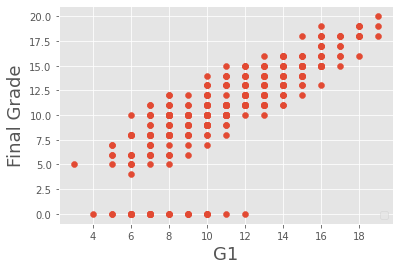

In [38]:
#visualize the data
plt.style.use('ggplot')
plot = "G1"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot, fontsize=18)
plt.ylabel("Final Grade", fontsize=18)
plt.show()


In [0]:
#load model into a file using pickle
with open('student_scores.pickle', 'wb') as f:
  pickle.dump(model, f)


In [0]:
#read model from pickle
pickle_in = open('student_scores.pickle', 'rb')
model = pickle.load(pickle_in)


In [49]:
#get model intercepts and coeff
print("-------------------------")
print('Coefficient: ', model.coef_)
print('Intercept: ', model.intercept_)
print("-------------------------")

-------------------------
Coefficient:  [ 0.12185354  0.98898037 -0.21641988 -0.30921037  0.03971373]
Intercept:  -1.1824722167791908
-------------------------
